In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [41]:
#generating sample time series dataset 

N = 1000
Tp = 800

t=np.arange(0,N)
x=np.sin(0.02*t) + 2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.103319
1,0.901316
2,1.037594
3,1.562865
4,0.133200


<function matplotlib.pyplot.show(close=None, block=None)>

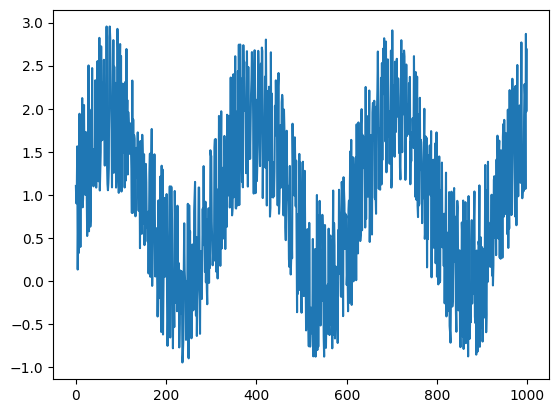

In [42]:
plt.plot(df)
plt.show

In [43]:
#split df into training and testing

values = df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [44]:
step=4

test= np.append(test,np.repeat(test[-1],step))
train= np.append(train,np.repeat(train[-1],step))

In [45]:
def convertToMatrix(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX, trainY = convertToMatrix(train, step)
testX, testY = convertToMatrix(test, step)

In [46]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape
textX.shape

(200, 4)

In [48]:
#simple RNN model

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop') 
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1457 (5.69 KB)
Trainable params: 1457 (5.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
#training model 

model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted=np.concatenate((trainPredict, testPredict),axis=0)

Epoch 1/100

50/50 - 1s - loss: 0.5988 - 860ms/epoch - 17ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4075 - 38ms/epoch - 758us/step
Epoch 3/100
50/50 - 0s - loss: 0.4024 - 38ms/epoch - 759us/step
Epoch 4/100
50/50 - 0s - loss: 0.3967 - 40ms/epoch - 794us/step
Epoch 5/100
50/50 - 0s - loss: 0.3947 - 38ms/epoch - 766us/step
Epoch 6/100
50/50 - 0s - loss: 0.3916 - 39ms/epoch - 786us/step
Epoch 7/100
50/50 - 0s - loss: 0.3880 - 40ms/epoch - 803us/step
Epoch 8/100
50/50 - 0s - loss: 0.3872 - 38ms/epoch - 751us/step
Epoch 9/100
50/50 - 0s - loss: 0.3916 - 39ms/epoch - 785us/step
Epoch 10/100
50/50 - 0s - loss: 0.3842 - 37ms/epoch - 743us/step
Epoch 11/100
50/50 - 0s - loss: 0.3829 - 39ms/epoch - 777us/step
Epoch 12/100
50/50 - 0s - loss: 0.3856 - 53ms/epoch - 1ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3825 - 46ms/epoch - 920us/step
Epoch 14/100
50/50 - 0s - loss: 0.3835 - 38ms/epoch - 760us/step
Epoch 15/100
50/50 - 0s - loss: 0.3812 - 42ms/epoch - 844us/step
Epoch 16/100
50/50 - 0s - loss: 0.3

In [53]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.3443852663040161
